In [1]:
import mmdet.apis
import mmdet.registry
import cv2
import mmcv
import matplotlib.pyplot as plt


In [2]:
# 指定模型及其对应的训练模型
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_didi.py'

with open('work_dirs/faster_rcnn_r50_fpn_1x_didi/last_checkpoint', 'rt') as f:
    checkpoint_file = f.read().strip()

In [ ]:
# build the model from a config file and a checkpoint file
model = mmdet.apis.init_detector(config_file, checkpoint_file, device='cuda:0')

In [4]:
# test a single image
img = 'your_data_path/dataset_release/train/2700.jpg'
img = cv2.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')

result = mmdet.apis.inference_detector(model, img)

c:\Users\User\miniconda3\envs\hw5\lib\site-packages\mmengine\utils\manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


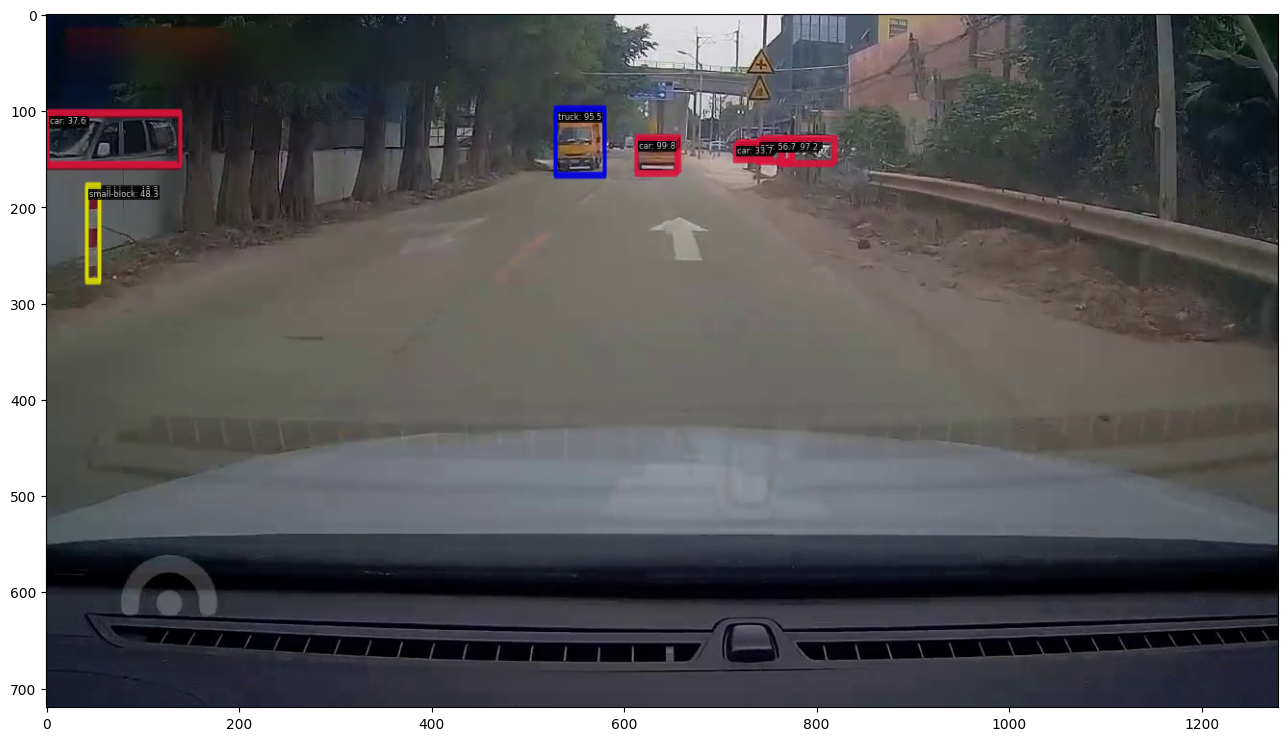

In [7]:
visualizer = mmdet.registry.VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta
visualizer.add_datasample(
    name='result',
    image=img,
    data_sample=result,
    draw_gt=False,
    pred_score_thr=0.3,
    show=False)

img = visualizer.get_image()

plt.figure(figsize=(16, 9))
plt.imshow(img)
